<a href="https://colab.research.google.com/github/liisipan/NetworkScience/blob/master/Project_in_Network_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font color='black'>  Community-level decision making: the Wikipedia requests for adminship </font></center></h1>
<h3><center><font color='black'> Project in Network Science (LTAT.02.011) </font></center></h3>
<h3><center><font color='black'> University of Tartu </font></center></h3>
<h3><center><font color='black'><b> Liisi Panov </font></center></h3>

================================================================================================================

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [22]:
#Read in the raw data and have a look at some of the first lines

file = open('wiki-RfA.txt', 'r')
lines = file.readlines()
file.close()

for line in lines[0:50]:
    print(line.strip())

SRC:Steel1943
TGT:BDD
VOT:1
RES:1
YEA:2013
DAT:23:13, 19 April 2013
TXT:'''Support''' as co-nom.

SRC:Cuchullain
TGT:BDD
VOT:1
RES:1
YEA:2013
DAT:01:04, 20 April 2013
TXT:'''Support''' as nominator.--

SRC:INeverCry
TGT:BDD
VOT:1
RES:1
YEA:2013
DAT:23:43, 19 April 2013
TXT:'''Support''' per noms.

SRC:Cncmaster
TGT:BDD
VOT:1
RES:1
YEA:2013
DAT:00:11, 20 April 2013
TXT:'''Support''' per noms. BDD is a strong contributor with thousands of edits and years of experience. I have no problem supporting.

SRC:Miniapolis
TGT:BDD
VOT:1
RES:1
YEA:2013
DAT:00:56, 20 April 2013
TXT:'''Support''', with great pleasure. I work with BDD at the [[WP:GOCE|Guild of Copy Editors]] (where we're both coordinators), and have seen their good work at RM and AfD. A fine addition to the admin corps.

SRC:Sven Manguard
TGT:BDD
VOT:1
RES:1
YEA:2013
DAT:01:53, 20 April 2013
TXT:'''Support''' There are plenty of important roles on this project, of which content creator is only one of them. BDD has done good work over

In [248]:
# Create a dataframe from the raw dataset
from collections import namedtuple

Item = namedtuple('item', 'source target vote result year date comment')
items = []

with open('wiki-RfA.txt', 'r') as file: 
    for line in file:
        l = line.rstrip('\n')
        
        if l.startswith('SRC:'):
          source = l[4:]
        elif l.startswith('TGT:'):
          target = l[4:]
        elif l.startswith('VOT:'):
          vote = l[4:]
        elif l.startswith('RES:'):
          result = l[4:]
        elif l.startswith('YEA:'):
          year = l[4:]
        elif l.startswith('DAT:'):
          date = l[4:]
        elif l.startswith('TXT'):
          comment = l[4:]

          item = Item(source, target, vote, result, year, date, comment)
          items.append(item)

df = pd.DataFrame.from_records(items, columns=item._fields)

In [249]:
df.shape

(204678, 7)

In [250]:
#drop rows were source or target is missing
df.drop(df[df['source'] == ""].index.union(df[df['target'] == ""].index), inplace=True)

In [251]:
df.shape

(202991, 7)

In [252]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [253]:
df.shape

(196610, 7)

In [254]:
df

,source,target,vote,result,year,date,comment
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
196605,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support
196606,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.
196607,Jiang,WhisperToMe,1,1,2003,,Support. --
196608,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity....


In [256]:
G = nx.from_pandas_edgelist(df=df[['source', 'target']], source='source', target='target', create_using=nx.DiGraph())

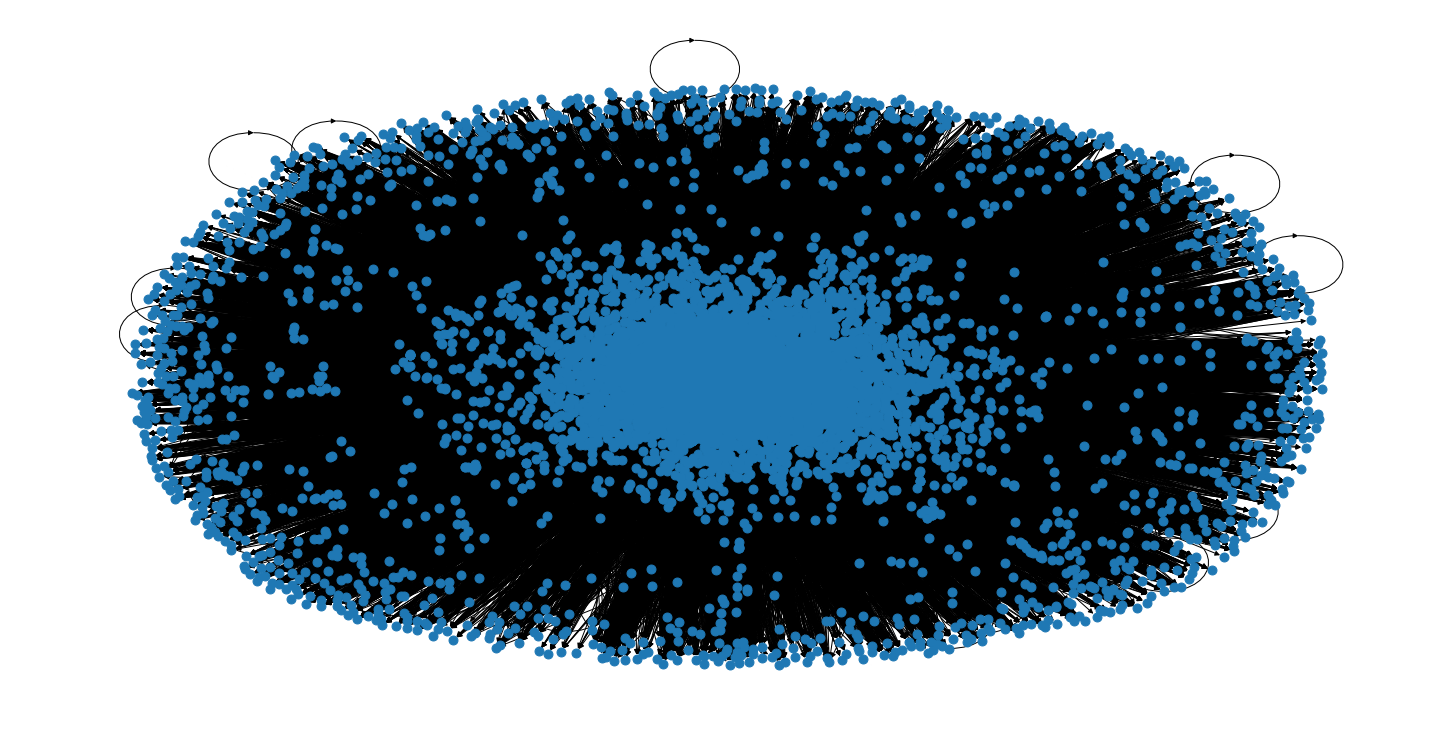

In [80]:
plt.figure(figsize=(20, 10))

nx.draw(G, node_size=80)

In [257]:
nx.info(G)

'DiGraph with 11377 nodes and 188077 edges'

In [258]:
round(nx.density(G), 3)

0.001

In [259]:
round(nx.average_clustering(G), 3)

0.109

In [260]:
round(nx.average_shortest_path_length(G), 3)

0.911

(array([1.0683e+04, 5.2900e+02, 1.0700e+02, 4.0000e+01, 8.0000e+00,
        5.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.4270e+02, 2.8440e+02, 4.2610e+02, 5.6780e+02,
        7.0950e+02, 8.5120e+02, 9.9290e+02, 1.1346e+03, 1.2763e+03,
        1.4180e+03]),
 <a list of 10 Patch objects>)

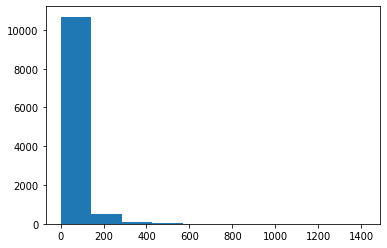

In [261]:
degrees = [G.degree(n) for n in G.nodes()]

plt.hist(degrees)

In [262]:
nx.is_strongly_connected(G)

False

In [263]:
nx.number_strongly_connected_components(G)

8928